## Plot accuracy

In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes

In [2]:
# load in the accuracy scores
accuracy_path <- file.path(
    paste0(
        "./accuracy_scores_per_heart.csv"
    )
)
# read in the data from the parquet file
accuracy_df <- read.csv(
    accuracy_path
)

accuracy_df <- accuracy_df %>%
  mutate(Cell_Type = case_when(
    Heart_Number %in% c(2, 7) ~ "Healthy",
    TRUE ~ "Failing"
  ))

# Mutate Data_Set column
accuracy_df <- accuracy_df %>%
  mutate(Data_Set = case_when(
    Data_Set == "Holdout1" & Heart_Number == 7 ~ "DMSO holdout",
    Data_Set == "Holdout1" & Heart_Number == 29 ~ "Failing heart holdout",
    Data_Set == "Holdout2" ~ "Random well holdout",
    TRUE ~ Data_Set  # Keep other values unchanged
  ))
  
dim(accuracy_df)
head(accuracy_df,2)

[1] 34  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.4406897,Shuffled,Training,2,Healthy
2,0.5293537,Shuffled,Training,4,Failing


In [3]:
final_df <- accuracy_df %>% filter(Model == "Final")
shuffled_df <- accuracy_df %>% filter(Model == "Shuffled")

dim(final_df)
head(final_df,2)
dim(shuffled_df)
head(shuffled_df,2)

[1] 17  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.9124138,Final,Training,2,Healthy
2,0.9067588,Final,Training,4,Failing


[1] 17  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.4406897,Shuffled,Training,2,Healthy
2,0.5293537,Shuffled,Training,4,Failing


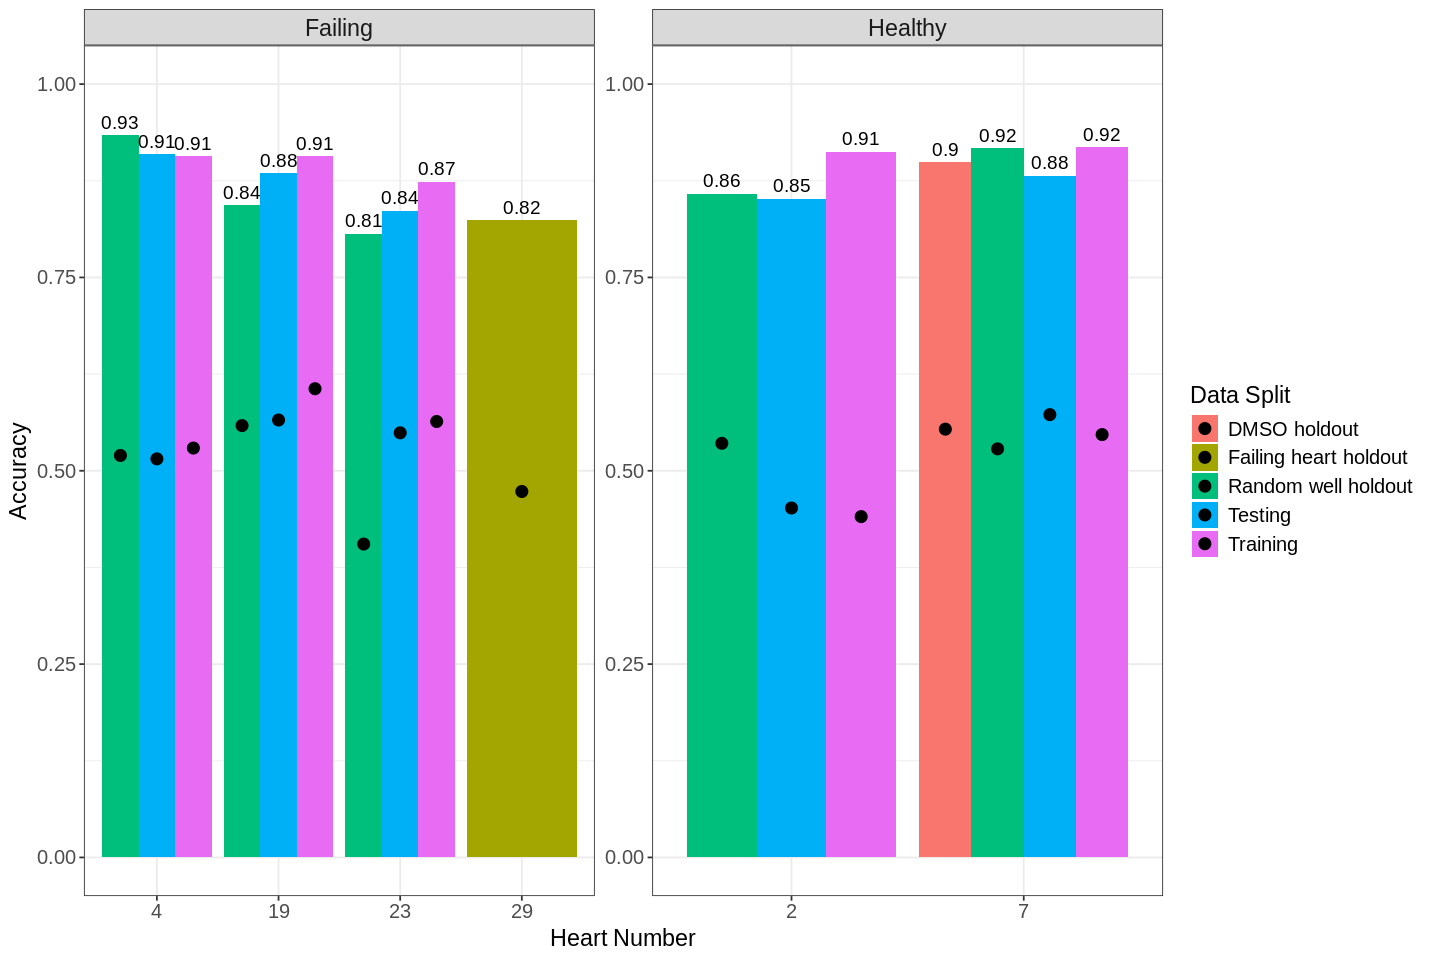

In [4]:
# Adjust plot size
options(repr.plot.width=12, repr.plot.height=8)

# Bar plot of accuracies based on cell type and data split
accuracy_plot_gg <- ggplot(final_df, aes(x = factor(Heart_Number), y = Accuracy, fill = Data_Set)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = round(Accuracy, 2)), position = position_dodge(width = 0.9), vjust = -0.5, size = 4) +  # Add accuracy numbers over bars with larger text size
  geom_point(data = shuffled_df, position = position_dodge(width = .9), size = 3) +  # Add points for shuffled_df with larger point size
  facet_wrap(~ Cell_Type, scales = "free") +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.25)) +  # Set y-axis limits, breaks, and format labels as percentages
  theme_bw() +
  labs(x = "Heart Number",
       y = "Accuracy",
       fill = "Data Split") +
  theme(
    strip.text = element_text(size = 14),  # Adjust facet titles size
    axis.title.x = element_text(size = 14),  # Adjust x-axis title size
    axis.title.y = element_text(size = 14),  # Adjust y-axis title size
    axis.text.x = element_text(size = 12),  # Adjust x-axis tick labels size
    axis.text.y = element_text(size = 12),  # Adjust y-axis tick labels size
    legend.title = element_text(size = 14),  # Adjust legend title size
    legend.text = element_text(size = 12),  # Adjust legend text size
    legend.position = "right"  # Move legend to the bottom
  )

# Save the plot as an image file using the options set for plot width and height
ggsave("./figures/accuracy_plot_plate_4_per_heart_downsample.pdf", plot = accuracy_plot_gg, width = getOption("repr.plot.width"), height = getOption("repr.plot.height"), dpi = 300)

accuracy_plot_gg